In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Combine all CSVs
import pandas as pd
import os

# Define the path where the folders with CSVs are located
data_path = '/content/drive/MyDrive/275/data'

# Initialize an empty list to store the dataframes
dataframes_list = []

# Walk through the directory
for root, dirs, files in os.walk(data_path):
    for file in files:
        # Check if the file is a CSV
        if file.endswith('.csv'):
            # Construct full file path
            file_path = os.path.join(root, file)
            # Read the CSV file without headers since files do not have headers
            df = pd.read_csv(file_path, header=None)
            # Append the dataframe to the list
            dataframes_list.append(df)

# Concatenate all dataframes in the list
combined_dataframe = pd.concat(dataframes_list, ignore_index=True)

# Show the combined dataframe's first few rows to verify the process
combined_dataframe.head()

In [ ]:
import pandas as pd
import os

In [ ]:
combined_dataframe.shape

(1167525, 13)

In [ ]:
combined_dataframe.to_csv('combined.csv', header=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/275/combined data/combined.csv', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,41.756130,-124.203470,2020-08-18T03:00,PM2.5,3.2,UG/M3,3.0,13,1,Crescent City,North Coast Unified Air Quality Management Dis...,840060150007,840060150007
1,1,40.776943,-124.177498,2020-08-18T03:00,PM10,2.0,UG/M3,2.0,2,1,Jacobs,North Coast Unified Air Quality Management Dis...,060231004,840060231004
2,2,43.989643,-124.109312,2020-08-18T03:00,PM2.5,2.3,UG/M3,2.2,10,1,Florence-Department of Forestry,Lane Regional Air Protection Agency,840410390100,840410390100
3,3,41.513830,-123.996230,2020-08-18T03:00,PM2.5,8.0,UG/M3,7.0,33,1,Klamath Glen,AIRSIS,840MMAIR1034,840MMAIR1034
4,4,39.437340,-123.787660,2020-08-18T03:00,PM10,9.0,UG/M3,12.0,8,1,Fort Bragg High School,Mendocino County AQMD,060450010,840060450010


In [ ]:
# drop index column
df = df.drop(0, axis=1)

In [ ]:
# add headers
headers = [
    "Latitude", "Longitude", "UTC", "Parameter", "Concentration",
    "Unit", "Raw Concentration", "AQI", "Category", "Site Name",
    "Site Agency", "AQS ID", "Full AQS ID"
]

df.columns = headers

In [ ]:
df.shape

(1167525, 13)

In [ ]:
df.head()

,Latitude,Longitude,UTC,Parameter,Concentration,Unit,Raw Concentration,AQI,Category,Site Name,Site Agency,AQS ID,Full AQS ID
0,41.756130,-124.203470,2020-08-18T03:00,PM2.5,3.2,UG/M3,3.0,13,1,Crescent City,North Coast Unified Air Quality Management Dis...,840060150007,840060150007
1,40.776943,-124.177498,2020-08-18T03:00,PM10,2.0,UG/M3,2.0,2,1,Jacobs,North Coast Unified Air Quality Management Dis...,060231004,840060231004
2,43.989643,-124.109312,2020-08-18T03:00,PM2.5,2.3,UG/M3,2.2,10,1,Florence-Department of Forestry,Lane Regional Air Protection Agency,840410390100,840410390100
3,41.513830,-123.996230,2020-08-18T03:00,PM2.5,8.0,UG/M3,7.0,33,1,Klamath Glen,AIRSIS,840MMAIR1034,840MMAIR1034
4,39.437340,-123.787660,2020-08-18T03:00,PM10,9.0,UG/M3,12.0,8,1,Fort Bragg High School,Mendocino County AQMD,060450010,840060450010


In [ ]:
# Check for missing values in the dataset
df.isnull().sum()

Latitude                0
Longitude               0
UTC                     0
Parameter               0
Concentration           0
Unit                    0
Raw Concentration       0
AQI                     0
Category                0
Site Name            1768
Site Agency             0
AQS ID                  0
Full AQS ID             0
dtype: int64

In [ ]:
# Check data types of each column
df.dtypes

Latitude             float64
Longitude            float64
UTC                   object
Parameter             object
Concentration        float64
Unit                  object
Raw Concentration    float64
AQI                    int64
Category               int64
Site Name             object
Site Agency           object
AQS ID                object
Full AQS ID           object
dtype: object

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Convert 'UTC' column to datetime format
df['UTC'] = pd.to_datetime(df['UTC'])

In [ ]:
df.dtypes

In [ ]:
# Filter the DataFrame to keep only rows with valid latitude and longitude ranges
df = df[
    (df['Latitude'] >= -90) & (df['Latitude'] <= 90) &
    (df['Longitude'] >= -180) & (df['Longitude'] <= 180)
]

In [ ]:
df.shape

(1167525, 13)

In [ ]:
# Filter the DataFrame to keep only rows with 'Category' values between 1 and 6 (inclusive)
df = df[
    (df['Category'] >= 1) & (df['Category'] <= 6)
]

In [ ]:
df.shape

(1098520, 13)

In [ ]:
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')
df['Raw Concentration'] = pd.to_numeric(df['Raw Concentration'], errors='coerce')
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

In [ ]:
df.dtypes

Latitude                    float64
Longitude                   float64
UTC                  datetime64[ns]
Parameter                    object
Concentration               float64
Unit                         object
Raw Concentration           float64
AQI                           int64
Category                      int64
Site Name                    object
Site Agency                  object
AQS ID                       object
Full AQS ID                  object
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-20-790cf5fc76ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


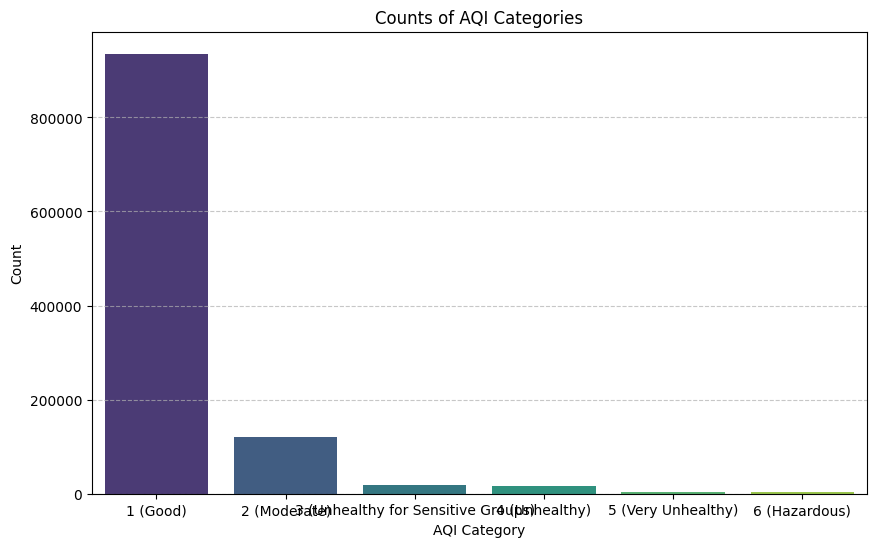

In [ ]:
# Plotting AQI Category Counts to visualize the distribution of AQI categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Counts of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(range(0, 6), ['1 (Good)', '2 (Moderate)', '3 (Unhealthy for Sensitive Groups)', '4 (Unhealthy)', '5 (Very Unhealthy)', '6 (Hazardous)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

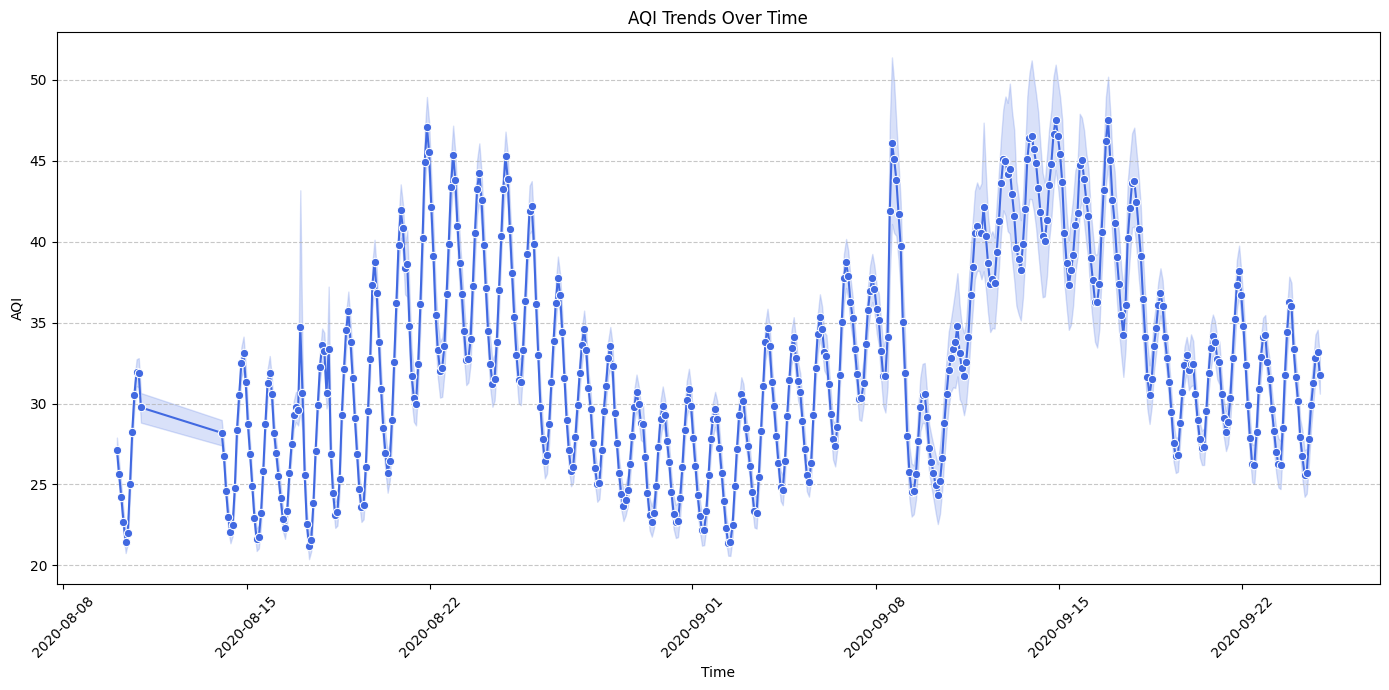

In [ ]:
# Plotting AQI over time to observe trends and patterns
plt.figure(figsize=(14, 7))
sns.lineplot(x='UTC', y='AQI', data=df, marker='o', linestyle='-', color='royalblue')
plt.title('AQI Trends Over Time')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-27-454d336d46a5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AQI', y='Site Name', data=top_10_sites, palette='coolwarm')


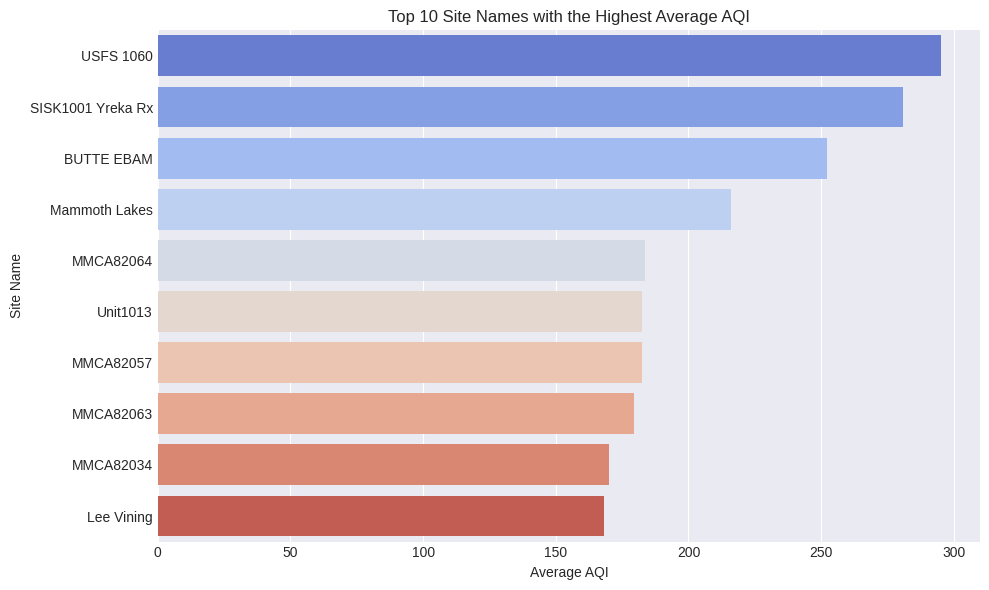

In [ ]:
# visualize the average AQI for each Site Name on a single graph

# Calculate mean AQI for each Site Name
avg_aqi_per_site = df.groupby('Site Name')['AQI'].mean().reset_index()

# Sort the DataFrame by average AQI in descending order and select the top 10
top_10_sites = avg_aqi_per_site.sort_values('AQI', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AQI', y='Site Name', data=top_10_sites, palette='coolwarm')
plt.title('Top 10 Site Names with the Highest Average AQI')
plt.xlabel('Average AQI')
plt.ylabel('Site Name')
plt.tight_layout()
plt.show()

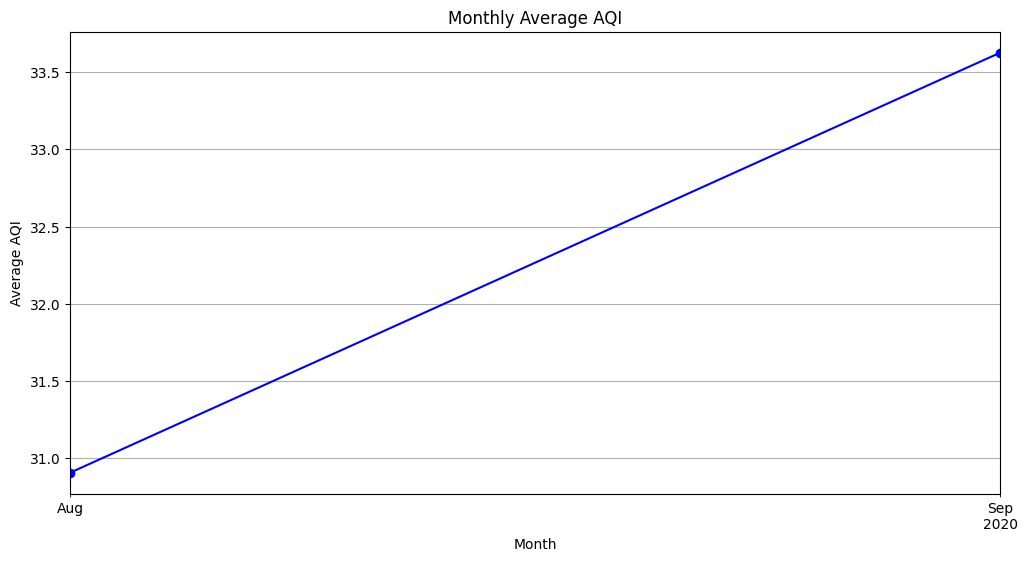

In [ ]:
df.set_index('UTC', inplace=True)

# Resample and calculate the mean AQI for each month
monthly_aqi = df['AQI'].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aqi.plot(kind='line', marker='o', color='b')
plt.title('Monthly Average AQI')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()